# Sentiment Analysis and Zero-Shot Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv('Amdro.csv', index_col = [0])

# Sentiment Analysis

In [3]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
#sample sentiment analysis
sample_review = list(df['review_text'])[1]
result = sentiment_pipeline(sample_review)
result

[{'label': 'Neutral', 'score': 0.6701036095619202}]

In [5]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


## Zero Shot Classificaiton

In [6]:
import transformers
from transformers import pipeline

In [7]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

## Sample Classification

this is where you can play around with the labels to see which ones would make sense

In [8]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[1]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'It did not germinate.',
 'labels': ['complaints', 'affordability', 'quality', 'satisfaction'],
 'scores': [0.34906914830207825,
  0.33437272906303406,
  0.2683006227016449,
  0.011717596091330051]}

In [9]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[2]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'this product is worthless despite following the instructions no sign of growth even after a month not 5 days as they claimed',
 'labels': ['complaints', 'affordability', 'satisfaction', 'quality'],
 'scores': [0.6898075342178345,
  0.14308561384677887,
  0.017286362126469612,
  0.009484479203820229]}

In [10]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[3]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'I dont see any improvement in my grass.I will observe for another week.',
 'labels': ['complaints', 'quality', 'affordability', 'satisfaction'],
 'scores': [0.6314849853515625,
  0.5986040830612183,
  0.25864359736442566,
  0.0643094927072525]}

In [11]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[4]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': '[This review was collected as part of a promotion.] This seems to do a good job of keeping bugs at bay with the plants on my porch. Price is good. Would recommend.',
 'labels': ['quality', 'affordability', 'satisfaction', 'complaints'],
 'scores': [0.9985098838806152,
  0.9899678826332092,
  0.7128213047981262,
  0.0022773724049329758]}

# Zero Shot Classification (Entire data)

Using the labels you identified above, you want to now run it through the entire data

In [12]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [13]:
# insert the labels you identified from above section
type = ['cost', 'efficient', 'effective', 'ease of use']

In [14]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [17]:
# create a "max" column for metric purposes
df['max'] = df[['cost_m', 'efficient_m', 'effective_m', 'ease of use_m']].max(axis=1)
df.head(3)

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment,cost_m,efficient_m,effective_m,ease of use_m,max
2238,Garden,18746,"AMDRO Quick Kill Carpenter Bee, Ant & Termite ...",http://www.homedepot.com/p/t/305448910,Homedepot,Amdro,305448910,305448729,Yes,2021-06-09T00:00:00,2021,6,23,Amdro works! We had never heard of carpenter ...,Amdro works! We had never heard of carpenter ...,organic reviews,8.96,5,0,0,0,No,amdro works! we had never heard of carpenter ...,2021-06-09,61,Neutral,0.700651,0.989641,0.996710,0.794774,0.996710
15196,Garden,90480,Smart Seed Sun & Shade Mixture 7lb bag,http://www.homedepot.com/p/314933321,Homedepot,PenningtonGrass,314933320,314933321,Yes,2022-04-13T00:00:00,2022,4,15,It did not germinate....,It did not germinate.,organic reviews,26.91,1,0,0,0,No,it did not germinate.,2022-04-13,4,Neutral,0.471956,0.027914,0.012979,0.071711,0.471956
19601,Garden,131125,"Pennington Smart Patch Sun & Shade Mix, 30 lb",http://www.homedepot.com/p/317713416,Homedepot,PenningtonGrass,317713419,317713416,Yes,2022-05-22T00:00:00,2022,5,20,nothing happened,this product is worthless despite following th...,organic reviews,28.98,1,0,0,0,No,this product is worthless despite following th...,2022-05-22,22,Negative,0.892627,0.001217,0.001102,0.007974,0.892627


# Metric and Sanity Check

[Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '7'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '23'),
 Text(0, 0, '259')]

0.8825

['this product is worthless despite following the instructions no sign of growth even after a month not 5 days as they claimed']

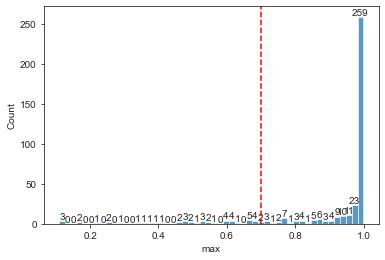

In [18]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'max', data = df);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
for container in ax.containers:
    ax.bar_label(container);

len(df[df['max'] > 0.7])/len(df['max'])
#subcategories of quality. may be too broad


list(df[df['max'] > 0.7]['review_lower'][1:2])

In [19]:
# to see how many uncategorized data remains
df_uncat = df[df['cost_m'] < 0.7]
df_uncat = df_uncat[df_uncat['efficient_m'] < 0.7]
df_uncat = df_uncat[df_uncat['effective_m'] < 0.7]
df_uncat = df_uncat[df_uncat['ease of use_m'] < 0.7]
df_uncat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 15196 to 11816
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   segment               47 non-null     object 
 1   review_id             47 non-null     int64  
 2   product_name          47 non-null     object 
 3   producturl            47 non-null     object 
 4   retailer              47 non-null     object 
 5   brand                 47 non-null     object 
 6   retailer_product_id   47 non-null     object 
 7   base_id               47 non-null     object 
 8   variants_flag         47 non-null     object 
 9   review_creation_date  47 non-null     object 
 10  year                  47 non-null     int64  
 11  month                 47 non-null     int64  
 12  week                  47 non-null     int64  
 13  review_title          45 non-null     object 
 14  review_text           47 non-null     object 
 15  review_type       

In [ ]:
#df_uncat.to_csv('data/unlabeld_data.csv')